In [60]:
import os
import pandas as pd

# Create an empty DataFrame to store the results
match_rate_by_state_df = pd.DataFrame(columns=['State', 'Regulatory Type', 'Match Percentage'])

directory = 'C:/Users/ac4296/OneDrive - Drexel University/Anubha & Dr. T - Shared/Urban Regulatory projects/Urban Final'
folder_path = f'{directory}/Output/Matching Urban to Drexel'
output_path = f'{directory}/Output/Match Rate'

# Loop through all files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith(".xlsx"):
        try:
            df1 = pd.read_excel(os.path.join(folder_path, file_name), header=0, engine='openpyxl')
        except Exception as e:
            print(f"Error reading {file_name}: {e}")
            continue

        # Convert 'Regulatory Type' column to lowercase for case-insensitive comparison
        df1['Regulatory Type'] = df1['Regulatory Type'].str.lower()

        # Calculate match percentage for each unique regulatory type within the DataFrame for the current state
        for regulatory_type in df1['Regulatory Type'].unique():
            subset_df = df1[df1['Regulatory Type'] == regulatory_type]
            total_non_empty_section = subset_df['section'].count()
            total_non_empty_section_code = subset_df['Section Code'].count()

            if total_non_empty_section_code > 0:
                match_percentage = (total_non_empty_section / total_non_empty_section_code) * 100
            else:
                match_percentage = ''  # If no Section Codes, consider it a 100% match

            # Add match rate to the DataFrame
            match_rate_by_state_df = match_rate_by_state_df.append({
                'State': file_name.split('_')[-1].split('.')[0].capitalize(),
                'Regulatory Type': regulatory_type,  # Keep original case
                'Match Percentage': match_percentage
            }, ignore_index=True)

# Restore original case of 'Regulatory Type' column
match_rate_by_state_df['Regulatory Type'] = match_rate_by_state_df['Regulatory Type'].str.capitalize()

# Save the results to a CSV file
# match_rate_by_state_df.to_csv('match_percentage_by_type.csv', index=False)


In [70]:
# match_rate_by_state_df.head(30)

In [62]:
# Extract unique regulatory types in the order they appear in the DataFrame
desired_order = match_rate_by_state_df['Regulatory Type'].unique()

# Pivot the DataFrame using the extracted order
pivot_df = match_rate_by_state_df.pivot(index='State', columns='Regulatory Type', values='Match Percentage')

# Reorder the columns based on the desired order
pivot_df = pivot_df[desired_order]

# Drop the 'State' column
pivot_df.drop(columns=['State'], inplace=True)

In [69]:
# pivot_df.head()

In [64]:
data =  pd.read_csv(f'{output_path}/match_percentages.csv', header=0)
data = data[['State','Match Percentage']]
match_final = pd.merge(pivot_df, data, on=['State'], how='outer')

# Rearrange the columns
match_final = match_final[['State', 'Match Percentage'] + [col for col in match_final.columns if col not in ['State', 'Match Percentage']]]

In [68]:
# match_final.head(50)

In [71]:
# Filter out non-numeric values from the DataFrame
numeric_data = match_final.drop(columns=['State']).apply(pd.to_numeric, errors='coerce')

# 
counts = numeric_data.apply(lambda x: x.dropna().notna().count())

# Add a new row to match_final with the counts
match_final.loc['# of States w Regulation'] = counts

# Calculate the average match rate for each column except the 'State' column
average_match_rate = numeric_data.mean()

# Add a new row to match_final with the average match rates
match_final.loc['Average Match Rate'] = average_match_rate

match_final.head()

,State,Match Percentage,Bifurcated,Registration office,Sale of assets,Mergers,Certificate of amendments,Voluntary dissolutions,Judicial dissolutions,Administrative dissolutions,...,Removal of board members,Does the state require registration by commercial fundraisers?,Does the state require registration by fundraising counsel?,Does the state oversee commercial-coventuring (e.g. by requiring that the co-venture be registered or by requiring that the charitable organization files the co-venture contract)?,Does the state require the fundraisers to provide notice to the regulator before any solicitation campaign (in addition to annual registration and/or filing the contract)?,Does the state require specified disclosures to donors?,Does the state require a copy of any contract between a charitable organization and a commercial fundraiser or fundraising counsel be filed with the regulator?,Does the state require annual financial reporting by commercial fundraisers?,Does the state require annual financial reporting by charitable organizations in addition to filing a copy of the 990 with the regulator (if filing 990 is required)?,Does the state require bonding of professional fundraisers?
0,Alabama,17.857143,0,,,100,0,100,100,,...,0,0,0,0,,0,0,0,0,0
1,Alaska,44.444444,0,,,100,100,100,100,100,...,0,,,,,,,,,0
2,Arizona,53.333333,0,,,100,100,100,0,0,...,50,,,,,,,,,
3,Arkansas,13.333333,0,,,0,100,0,33.3333,0,...,100,0,0,0,0,0,0,0,0,0
4,California,52.500000,0,,100,100,100,,100,,...,100,0,0,0,0,0,0,0,0,0


In [92]:
match_final.to_csv(f'{output_path}/match_percentage_by_type_pivot_new.csv', index=True)

In [99]:
data2 = pd.read_excel(f'{output_path}/match_percentage_by_type_pivot_table1.xlsx', sheet_name=2, header=0, engine='openpyxl')

In [100]:
# data2.head()

,Unnamed: 0,State,Match Percentage,Unnamed: 3,Bifurcation,"Requirements for Notice, Filing or Review of Transactions",Requirements for Notice or Action for Dissolutions,"Statutory Requirements for Notice, Oversight or Filing of Hospital Conversions",Audit requirements,Exemptions from Registering\t\t\t\t\t\t\t\t\t,Remedies,Fundraising
0,0,Alabama,17.857143,NaN,0.0,50.0,100.000000,NaN,NaN,0.0,50.0,0.0
1,1,Alaska,44.444444,NaN,0.0,100.0,100.000000,NaN,NaN,0.0,50.0,0.0
2,2,Arizona,53.333333,NaN,0.0,100.0,33.333333,100.0,NaN,0.0,25.0,NaN
3,3,Arkansas,13.333333,NaN,0.0,50.0,11.111111,NaN,0.0,0.0,100.0,0.0
4,4,California,52.500000,NaN,0.0,100.0,100.000000,100.0,0.0,0.0,100.0,0.0


AssertionError: Some items were not contained in blocks

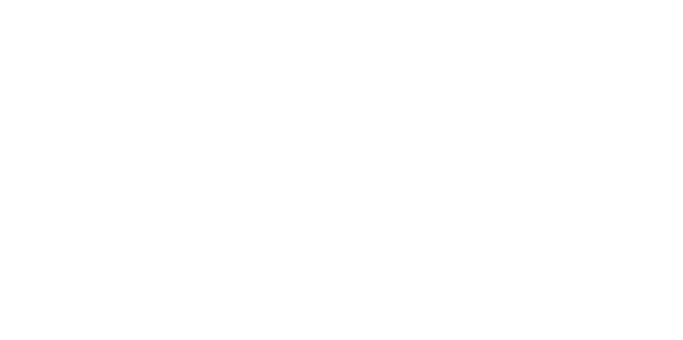

In [104]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# df = pd.DataFrame(data2)

# # Create the table
# fig, ax = plt.subplots(figsize=(12, 6))
# ax.axis('tight')
# ax.axis('off')
# table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# # Set column widths
# table.auto_set_column_width(col=list(range(len(df.columns))))

# # Save the table as an image
# plt.savefig('table_image.png', bbox_inches='tight', pad_inches=0.05)
# plt.show()
